In [129]:
import torch 
from torch import nn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### data

In [72]:
data = torch.randn((2000,2))

# linear => 1layer

In [89]:
X = data
def func(x_1, x_2):
    if x_2>x_1:
        return 1
    else:
        return 0
y = []
for x_1, x_2 in zip(X[:,0], X[:,1]):
    y.append(func(x_1, x_2))
#add nois
X +=  torch.randn(2000,2)/4

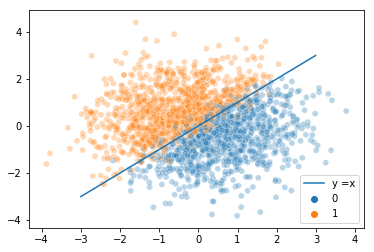

In [90]:
x = np.arange(-3,3,0.01)
plt.plot(x ,x, label='y =x')
sns.scatterplot(X[:,0], X[:,1], hue=y, alpha=0.3)

In [91]:
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = torch.from_numpy(X_train) .float() 
X_test = torch.from_numpy(X_test) .float() 
y_train = torch.from_numpy(y_train) .float() 
y_test = torch.from_numpy(y_test) .float() 

epoch 0, loss 0.2973001301288605  val_loss 0.29495805501937866
epoch 500, loss 0.10941607505083084  val_loss 0.10780224204063416
epoch 1000, loss 0.08607793599367142  val_loss 0.08411186188459396
epoch 1500, loss 0.07702470570802689  val_loss 0.07462120056152344
epoch 2000, loss 0.07185815274715424  val_loss 0.06910942494869232
epoch 2500, loss 0.06843235343694687  val_loss 0.06540781259536743
epoch 3000, loss 0.06596598774194717  val_loss 0.06271366775035858
epoch 3500, loss 0.06409348547458649  val_loss 0.060647737234830856
epoch 4000, loss 0.06261760741472244  val_loss 0.0590040422976017
epoch 4500, loss 0.061421312391757965  val_loss 0.057659752666950226
epoch 5000, loss 0.06043033301830292  val_loss 0.05653655156493187


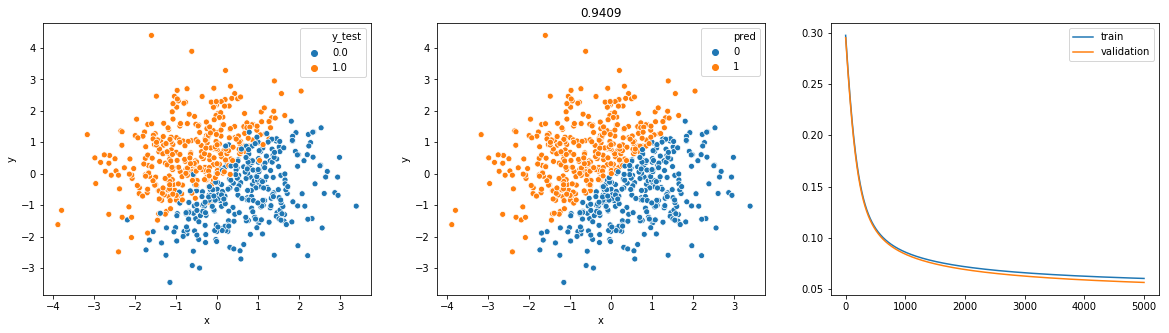

In [92]:
model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=1), 
                            nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
loss_val_list = []
iteration_number =5001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    pred = model(X_test)
    loss_val = mse(pred.squeeze(), y_test.squeeze())
    loss_val_list.append(loss_val)
    # print loss
    if(iteration % 500 == 0):
        print('epoch {}, loss {}  val_loss {}'.format(iteration, loss.data, loss_val))
    
    
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test')
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred')
plt.title(str((df.pred==df.y_test).mean())[:6])
plt.subplot(1,3,3)
plt.plot(loss_list, label='train')
plt.plot(loss_val_list, label='validation')
plt.legend()
plt.show()

# quadratic function => 2layer

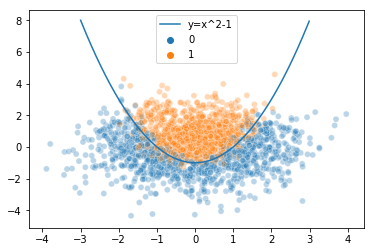

In [104]:
X = data
def func(x_1, x_2):
    if x_2>x_1**2-1:
        return 1
    else:
        return 0
y = []
for x_1, x_2 in zip(X[:,0], X[:,1]):
    y.append(func(x_1, x_2))
#add nois
X +=  torch.randn(2000,2)/4

x = np.arange(-3,3,0.01)
plt.plot(x ,x**2-1, label='y=x^2-1')
sns.scatterplot(X[:,0], X[:,1], hue=y, alpha=0.3)

epoch 0, loss 0.2624927759170532  val_loss 0.26088225841522217
epoch 500, loss 0.19664396345615387  val_loss 0.19619005918502808
epoch 1000, loss 0.1513117104768753  val_loss 0.15127907693386078
epoch 1500, loss 0.12042968720197678  val_loss 0.1216963455080986
epoch 2000, loss 0.09983808547258377  val_loss 0.10205972194671631
epoch 2500, loss 0.0867602527141571  val_loss 0.08887890726327896
epoch 3000, loss 0.07860592007637024  val_loss 0.0805874615907669
epoch 3500, loss 0.0733940377831459  val_loss 0.07520228624343872
epoch 4000, loss 0.06982961297035217  val_loss 0.07151602953672409
epoch 4500, loss 0.06728513538837433  val_loss 0.06887215375900269
epoch 5000, loss 0.06539145857095718  val_loss 0.06690256297588348


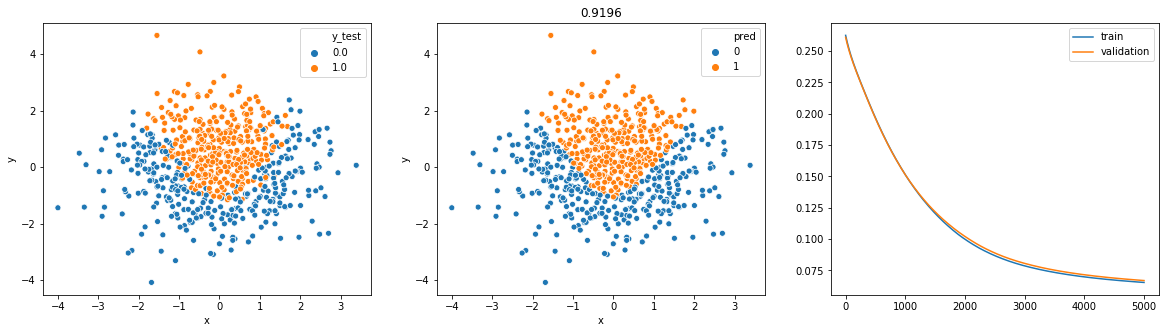

In [103]:
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = torch.from_numpy(X_train) .float() 
X_test = torch.from_numpy(X_test) .float() 
y_train = torch.from_numpy(y_train) .float() 
y_test = torch.from_numpy(y_test) .float() 

model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=10), 
                            nn.ReLU(),
                            nn.Linear(10,  1),
                            nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
loss_val_list = []
iteration_number =5001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    pred = model(X_test)
    loss_val = mse(pred.squeeze(), y_test.squeeze())
    loss_val_list.append(loss_val)
    # print loss
    if(iteration % 500 == 0):
        print('epoch {}, loss {}  val_loss {}'.format(iteration, loss.data, loss_val))
    
    
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test')
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred')
plt.title(str((df.pred==df.y_test).mean())[:6])
plt.subplot(1,3,3)
plt.plot(loss_list, label='train')
plt.plot(loss_val_list, label='validation')
plt.legend()
plt.show()

# Cubic function =>  3layer

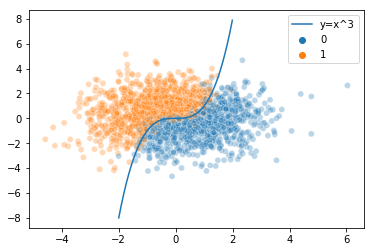

In [114]:
X = data
def func(x_1, x_2):
    if x_2>x_1**3:
        return 1
    else:
        return 0
y = []
for x_1, x_2 in zip(X[:,0], X[:,1]):
    y.append(func(x_1, x_2))
#add nois
X +=  torch.randn(2000,2)/4

x = np.arange(-2,2,0.01)
plt.plot(x ,x**3, label='y=x^3')

sns.scatterplot(X[:,0], X[:,1], hue=y, alpha=0.3)

In [ ]:
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = torch.from_numpy(X_train) .float() 
X_test = torch.from_numpy(X_test) .float() 
y_train = torch.from_numpy(y_train) .float() 
y_test = torch.from_numpy(y_test) .float() 

model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=20), 
                            nn.ReLU(),
                            nn.Linear(20,  20),
                            nn.ReLU(),
                            nn.Linear(20,  1),
                            nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
loss_val_list = []
iteration_number =5001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    pred = model(X_test)
    loss_val = mse(pred.squeeze(), y_test.squeeze())
    loss_val_list.append(loss_val)
    # print loss
    if(iteration % 500 == 0):
        print('epoch {}, loss {}  val_loss {}'.format(iteration, loss.data, loss_val))
    
    
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test')
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred')
plt.title(str((df.pred==df.y_test).mean())[:6])
plt.subplot(1,3,3)
plt.plot(loss_list, label='train')
plt.plot(loss_val_list, label='validation')
plt.legend()
plt.show()

# 4, 5  layer

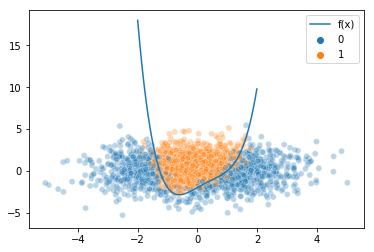

epoch 0, loss 0.25008317828178406  val_loss 0.2500152587890625
epoch 500, loss 0.1900971233844757  val_loss 0.1927545964717865
epoch 1000, loss 0.12595513463020325  val_loss 0.1315445750951767
epoch 1500, loss 0.07713250070810318  val_loss 0.08364032208919525
epoch 2000, loss 0.06391546875238419  val_loss 0.07061924040317535
epoch 2500, loss 0.05957041308283806  val_loss 0.06632985174655914
epoch 3000, loss 0.057675689458847046  val_loss 0.06447283923625946
epoch 3500, loss 0.05669832602143288  val_loss 0.06361017376184464
epoch 4000, loss 0.05613243952393532  val_loss 0.06320439279079437
epoch 4500, loss 0.055781103670597076  val_loss 0.06300882995128632
epoch 5000, loss 0.055541299283504486  val_loss 0.06292610615491867


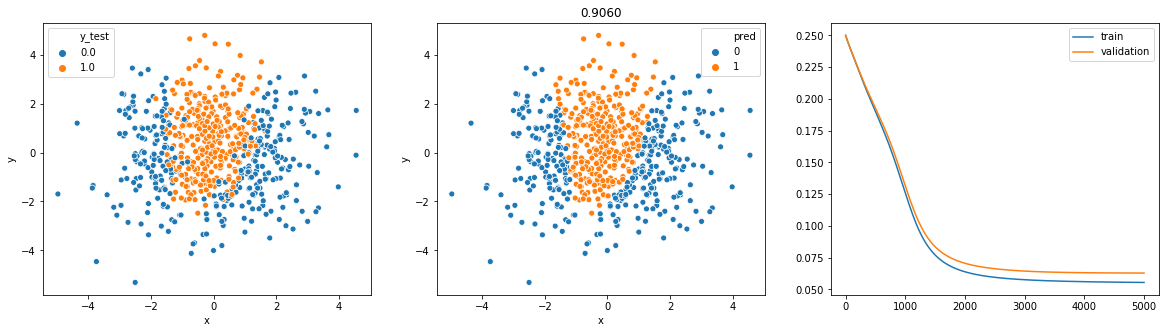

In [122]:
X = data
def func(x_1, x_2):
    if x_2>x_1**4-x_1**3+2*x_1-2:
        return 1
    else:
        return 0
y = []
for x_1, x_2 in zip(X[:,0], X[:,1]):
    y.append(func(x_1, x_2))
#add nois
X +=  torch.randn(2000,2)/4

x = np.arange(-2,2,0.01)
plt.plot(x ,x**4-x**3+2*x-2, label='f(x)')

sns.scatterplot(X[:,0], X[:,1], hue=y, alpha=0.3)
plt.show()

X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = torch.from_numpy(X_train) .float() 
X_test = torch.from_numpy(X_test) .float() 
y_train = torch.from_numpy(y_train) .float() 
y_test = torch.from_numpy(y_test) .float() 

model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=30), 
                            nn.ReLU(),
                            nn.Linear(30,  30),
                            nn.ReLU(),
                            nn.Linear(30,  30),
                            nn.ReLU(),
                            nn.Linear(30,  1),
                            nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
loss_val_list = []
iteration_number =5001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    pred = model(X_test)
    loss_val = mse(pred.squeeze(), y_test.squeeze())
    loss_val_list.append(loss_val)
    # print loss
    if(iteration % 500 == 0):
        print('epoch {}, loss {}  val_loss {}'.format(iteration, loss.data, loss_val))
    
    
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test')
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred')
plt.title(str((df.pred==df.y_test).mean())[:6])
plt.subplot(1,3,3)
plt.plot(loss_list, label='train')
plt.plot(loss_val_list, label='validation')
plt.legend()
plt.show()

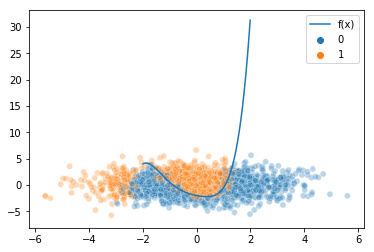

epoch 0, loss 0.24992498755455017  val_loss 0.24994762241840363
epoch 500, loss 0.20924012362957  val_loss 0.21232372522354126
epoch 1000, loss 0.16843396425247192  val_loss 0.1764226257801056
epoch 1500, loss 0.1359594613313675  val_loss 0.14743748307228088
epoch 2000, loss 0.10101985931396484  val_loss 0.11586549878120422
epoch 2500, loss 0.07681629806756973  val_loss 0.09291812777519226
epoch 3000, loss 0.06726457923650742  val_loss 0.08436618745326996
epoch 3500, loss 0.06344182044267654  val_loss 0.08138485997915268
epoch 4000, loss 0.06162698194384575  val_loss 0.08021919429302216
epoch 4500, loss 0.06051988899707794  val_loss 0.07973229140043259
epoch 5000, loss 0.059618208557367325  val_loss 0.07954846322536469


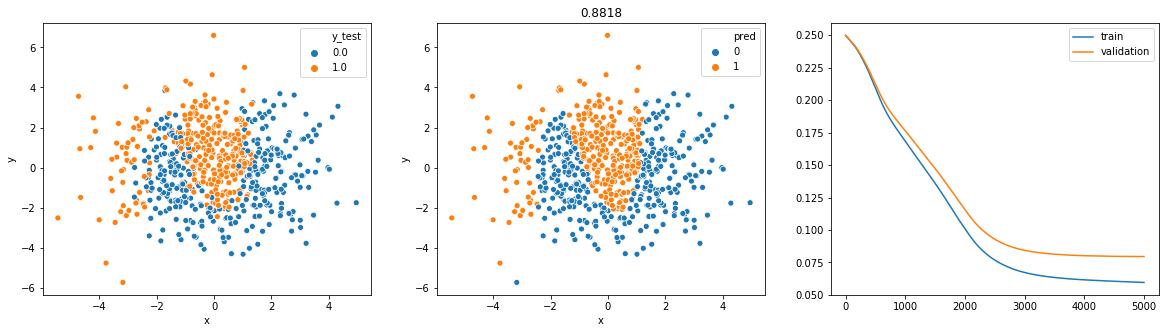

In [131]:
X = data
def func(x_1, x_2):
    if x_2 > 0.5*(x_1**5)+x_1**4+x_1**2-x_1-2:
        return 1
    else:
        return 0
y = []
for x_1, x_2 in zip(X[:,0], X[:,1]):
    y.append(func(x_1, x_2))
#add nois
X +=  torch.randn(2000,2)/4

x = np.arange(-2,2,0.01)
plt.plot(x , 0.5*(x**5)+x**4+x**2-x-2, label='f(x)')

sns.scatterplot(X[:,0], X[:,1], hue=y, alpha=0.3)
plt.show()

X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = torch.from_numpy(X_train) .float() 
X_test = torch.from_numpy(X_test) .float() 
y_train = torch.from_numpy(y_train) .float() 
y_test = torch.from_numpy(y_test) .float() 

model = torch.nn.Sequential(nn.Linear(in_features=2, out_features=40), 
                            nn.ReLU(),
                            nn.Linear(40,  40),
                            nn.ReLU(),
                            nn.Linear(40,  40),
                            nn.ReLU(),
                            nn.Linear(40,  40),
                            nn.ReLU(),
                            nn.Linear(40,  1),
                            nn.Sigmoid())
model = model.train()

mse = nn.MSELoss()
learning_rate = 0.02  
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
loss_list = []
loss_val_list = []
iteration_number =5001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(X_train)
    # Calculate Loss
    loss = mse(results.squeeze(), y_train.squeeze())
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    pred = model(X_test)
    loss_val = mse(pred.squeeze(), y_test.squeeze())
    loss_val_list.append(loss_val)
    # print loss
    if(iteration % 500 == 0):
        print('epoch {}, loss {}  val_loss {}'.format(iteration, loss.data, loss_val))
    
    
pred = model(X_test).squeeze().tolist()
for i, p in enumerate(pred):
    if p>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

df = pd.DataFrame(data={'x':X_test[:,0], 'y':X_test[:,1], 'y_test':y_test.squeeze(), 'pred':pred})
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='x', y='y', hue='y_test')
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='x', y='y', hue='pred')
plt.title(str((df.pred==df.y_test).mean())[:6])
plt.subplot(1,3,3)
plt.plot(loss_list, label='train')
plt.plot(loss_val_list, label='validation')
plt.legend()
plt.show()